# Ada Boost Regressor Model:

c:\Users\chesa\Desktop\MLG382\Github ProjectStuff CYO P2\MLG382_CYO_PROJ_GroupX\src\preprocess_data.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'])


Model: AdaBoostRegressor
R2 Score: 0.9329
Mean Absolute Error: 0.23
Mean Squared Error: 0.07
--------------------------------------------------
Saved model to: ../artifacts\AdaBoostRegressor_model.pkl


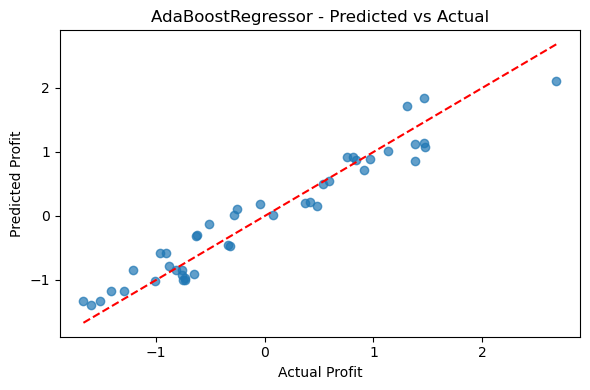

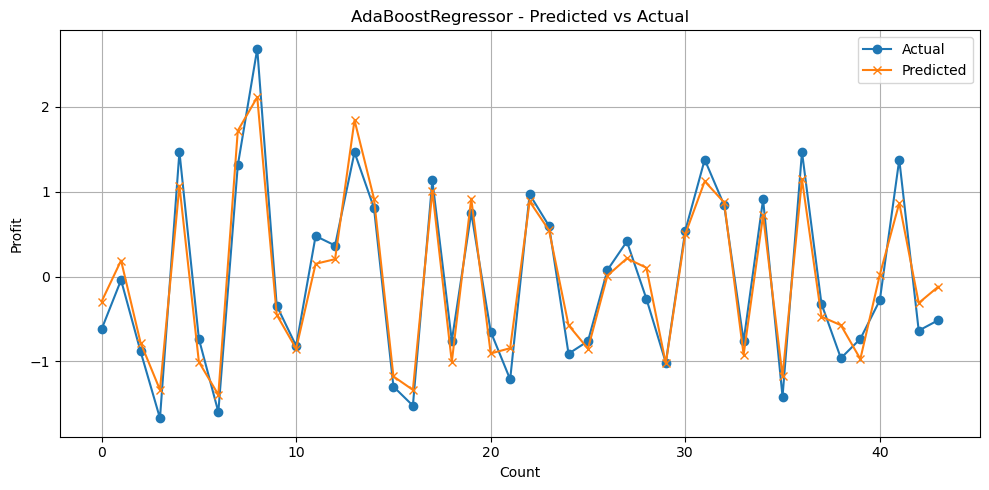

In [4]:
#Importing Required Libraries
import sys
import os
import numpy as np

#Allows for model to reload without reloading Kernel
import importlib

from sklearn.ensemble import AdaBoostRegressor

#Python files can be used 
sys.path.append(os.path.abspath("../src"))

#preprocess_data.py file importing functions
from preprocess_data import (
    load_data, 
    iterative_outlier_removal, 
    scale_features
)

#prepare_data.py file importing functions
from prepare_data import (
    split_features_target, 
    create_train_test_split)

#Loads adaboost function from train_models.py
from train_models import train_adaboost


#Loads data for use from preprocess_data.py 
df = load_data('../data/Cleaned_ML_Dataset.csv')

#Selects all columns that include number properties from the dataframe
numerical_columns = df.select_dtypes(include=[np.number]).columns

#Calls the iterative outlier removal function from preprocess_data.py to remove outliers
df = iterative_outlier_removal(df, numerical_columns)

#Calls the scale features function from preprocess_data.py to scale features
df, scaler = scale_features(df, numerical_columns)

#Calls the split_features_target function from prepare_data.py to split data into features and target
X, Y = split_features_target(df)

#Calls the create_train_test_split function from prepare_data.py to split data into train and test sets
X_train, X_test, Y_train, Y_test = create_train_test_split(X, Y)

#Imports entire file for reload function
import train_models

#Calls the reload function from train_models.py to automatically reload models
importlib.reload(train_models)

#Calls the train_adaboost function from train_models.py to train the adaboost model
train_adaboost(X_train, X_test, Y_train, Y_test)

